In [1]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set()

In [2]:
train_file_path = 'train.csv'
train_raw = pd.read_csv(train_file_path)

In [3]:
column_names = ['date', 'in_out', 'latitude', 'longitude',
                '6~7_ride', '7~8_ride', '8~9_ride',
                '9~10_ride', '10~11_ride', '11~12_ride',
                '6~7_takeoff', '7~8_takeoff', '8~9_takeoff',
                '9~10_takeoff', '10~11_takeoff', '18~20_ride']

raw_dataset = pd.read_csv(train_file_path, usecols=column_names,
                          na_values='?', skipinitialspace=True)

dataset = raw_dataset.copy()
dataset['date'] = pd.to_datetime(dataset['date'])
dataset['weekday'] = dataset['date'].dt.weekday
dataset.tail()

,date,in_out,latitude,longitude,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,18~20_ride,weekday
415418,2019-09-30,시내,33.41437,126.26336,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
415419,2019-09-30,시내,33.49946,126.51479,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
415420,2019-09-30,시내,33.23100,126.26273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
415421,2019-09-30,시내,33.46483,126.31870,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
415422,2019-09-30,시내,33.24873,126.50799,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0


In [4]:
# 주말 데이터
dataset['weekend'] = (dataset['weekday'] >= 5).astype(float)

# 휴일 데이터
holidays = pd.to_datetime(['2019-09-12', '2019-09-13', '2019-09-14', 
                           '2019-10-03', '2019-10-09'])
dataset['holidays'] = dataset['date'].isin(holidays)*1.0

# 요일 one hot encoding
dataset['mon'] = (dataset['weekday'] == 0)*1.0
dataset['tue'] = (dataset['weekday'] == 1)*1.0
dataset['wed'] = (dataset['weekday'] == 2)*1.0
dataset['thu'] = (dataset['weekday'] == 3)*1.0
dataset['fri'] = (dataset['weekday'] == 4)*1.0
dataset['sat'] = (dataset['weekday'] == 5)*1.0
dataset['sun'] = (dataset['weekday'] == 6)*1.0

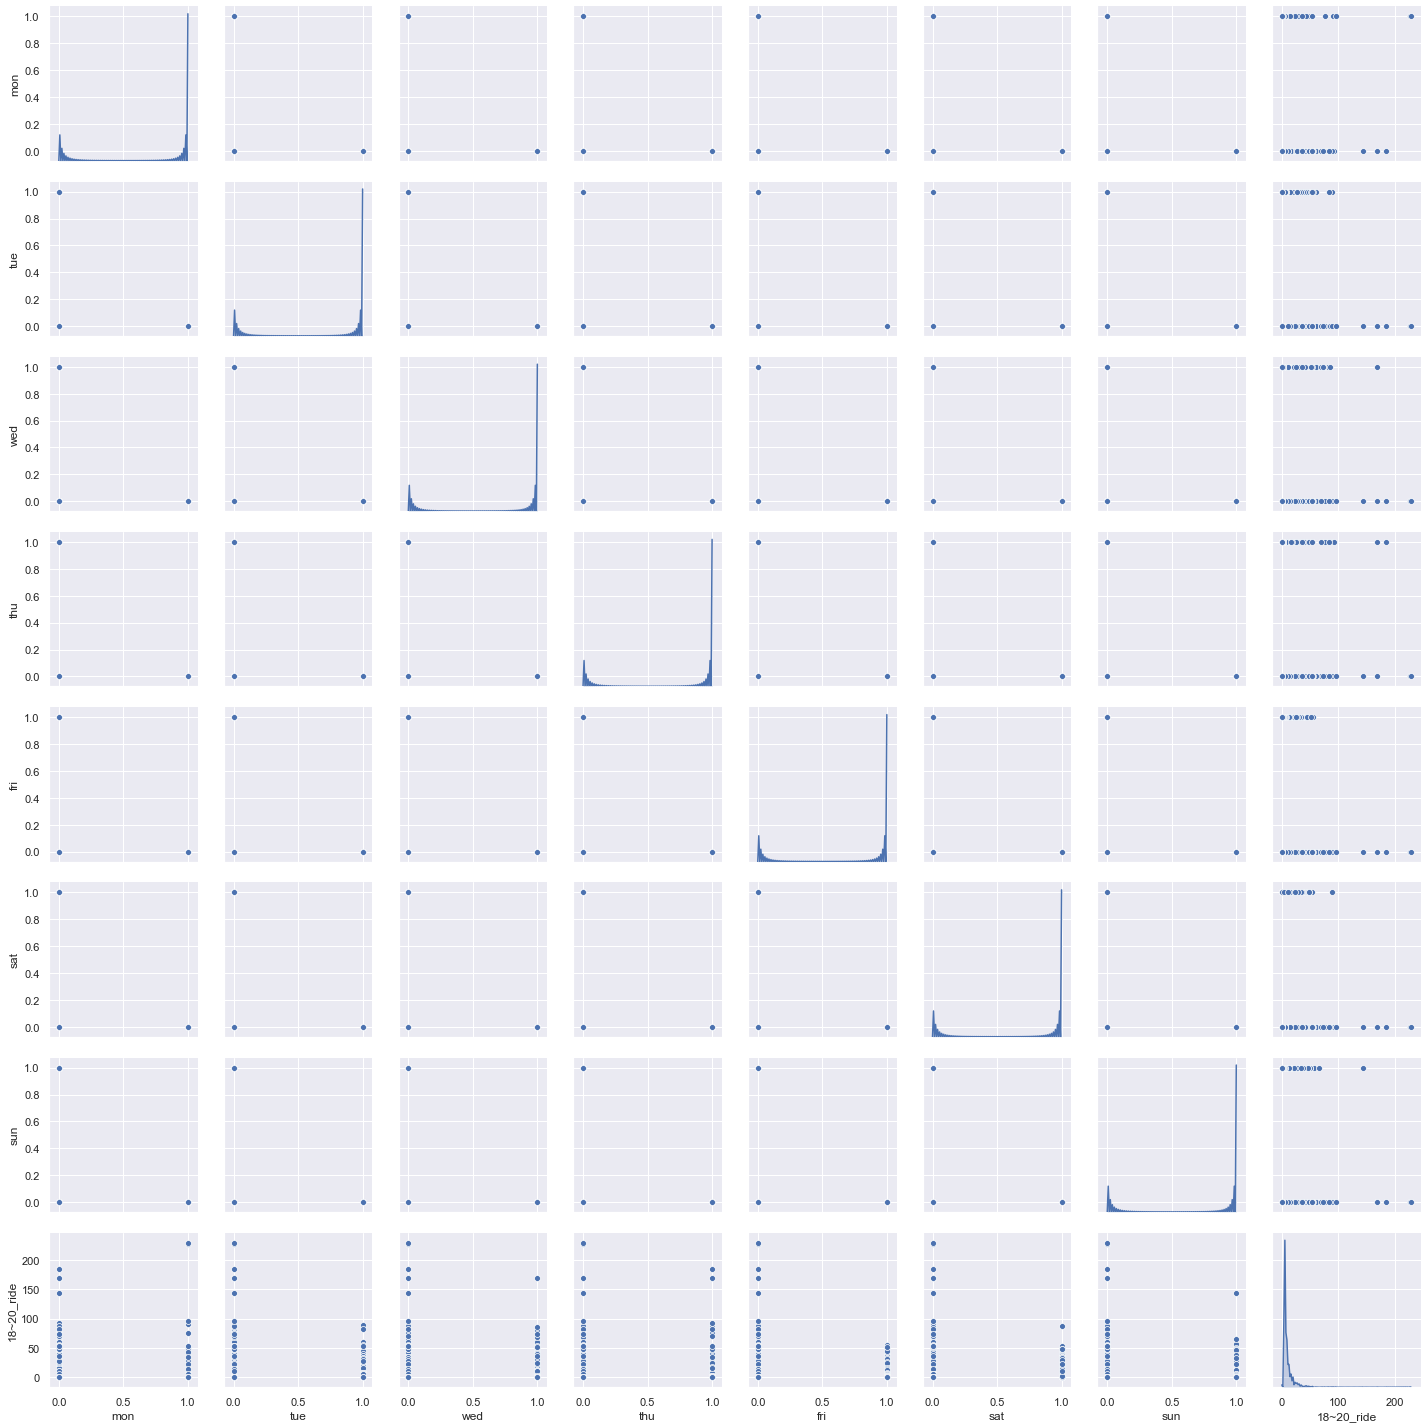

In [5]:
sample_data = dataset.sample(frac=0.1)
sns.pairplot(sample_data[['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun', '18~20_ride']], diag_kind='kde')

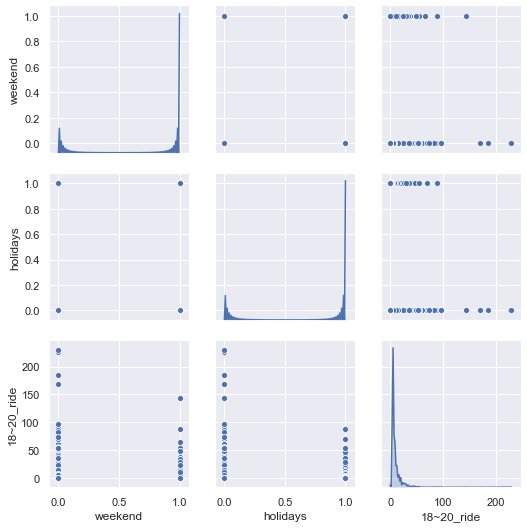

In [7]:
sns.pairplot(sample_data[['weekend', 'holidays', '18~20_ride']], diag_kind='kde')

C:\Users\imdff\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


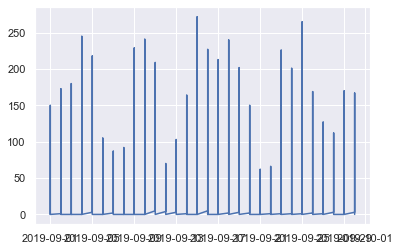

In [9]:
plt.plot(dataset['date'], dataset['18~20_ride'])

,date,in_out,latitude,longitude,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,...,weekday,weekend,holidays,mon,tue,wed,thu,fri,sat,sun
0,2019-09-01,시외,33.48990,126.49373,0.0,1.0,2.0,5.0,2.0,6.0,...,6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2019-09-01,시외,33.48944,126.48508,1.0,4.0,4.0,2.0,5.0,6.0,...,6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2019-09-01,시외,33.48181,126.47352,1.0,1.0,0.0,2.0,0.0,0.0,...,6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2019-09-01,시내,33.50577,126.49252,0.0,17.0,6.0,26.0,14.0,16.0,...,6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2019-09-01,시내,33.25579,126.41260,0.0,0.0,0.0,0.0,0.0,0.0,...,6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415418,2019-09-30,시내,33.41437,126.26336,4.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
415419,2019-09-30,시내,33.49946,126.51479,4.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
415420,2019-09-30,시내,33.23100,126.26273,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
415421,2019-09-30,시내,33.46483,126.31870,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
